<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ML-lab2¶" data-toc-modified-id="ML-lab2¶-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ML lab2¶</a></span><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Train" data-toc-modified-id="Train-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Train</a></span></li><li><span><a href="#result" data-toc-modified-id="result-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>result</a></span></li></ul></li></ul></div>

###  ML lab2¶

Yacht Hydrodynamics Data Set

* Student ID:192050223
* First Name:Liu
* Last Name: Jun

#### Description
Practice work description

In the second lab you should learn how to use scikit learn and pandas libraries in solving of machine learning tasks.

Also, you will get to know the k-nearest neighbors method.

Variants for your practice work are placed in a directory 'variants' and xls-file contains the number of your variant.

Taks statement:

Please, investigate the "knn example" directory. This example shows how to use scikit learn's kNN method, pandas dataframes and

how to estimate the machine learning classification algorithm in a simple manner.


**In according to you variant prepare ipython notebook file that solve regression or classification task using kNN approach and estimate your model using accuracy and confusion matrix for a classification problem or r2_score for regression.**

Also, try to tune parameters of kNN algorithm to achieve better results in according to quality measure (accuracy or r2 score)

* Variant 9
* Yacht Hydrodynamics Data Set
 * 1.Longitudinal position of the center of buoyancy, adimensional.
 * 2.Prismatic coefficient, adimensional.
 * 3.Length-displacement ratio, adimensional.
 * 4.Beam-draught ratio, adimensional.
 * 5.Length-beam ratio, adimensional.
 * 6.Froude number, adimensional.
 * 7.Residuary resistance per unit weight of displacement, adimensional.
 
The measured variable is the residuary resistance per unit weight of displacement:


In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#### Data 

In [3]:
df = pd.read_csv("./yacht_hydrodynamics.data",sep= " ", header=None)
#df.head()
df.describe()

,0,1,2,3,4,5,6
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,-2.381818,0.564136,4.788636,3.936818,3.206818,0.287500,10.495357
std,1.513219,0.023290,0.253057,0.548193,0.247998,0.100942,15.160490
min,-5.000000,0.530000,4.340000,2.810000,2.730000,0.125000,0.010000
25%,-2.400000,0.546000,4.770000,3.750000,3.150000,0.200000,0.777500
50%,-2.300000,0.565000,4.780000,3.955000,3.150000,0.287500,3.065000
75%,-2.300000,0.574000,5.100000,4.170000,3.510000,0.375000,12.815000
max,0.000000,0.600000,5.140000,5.350000,3.640000,0.450000,62.420000


In [6]:
X=df.values[:,0:-1]
y=df.values[:,-1] # the index 6 is the target
print("X: ",X.shape)
print("y: ",y.shape)

X:  (308, 6)
y:  (308,)


In [7]:
# data normalaiztion
from sklearn.preprocessing import StandardScaler
ss_X=StandardScaler()
ss_y=StandardScaler()

X_train=ss_X.fit_transform(X_train)
X_test=ss_X.transform(X_test)
y_train=ss_y.fit_transform(y_train.reshape(-1, 1))
y_test=ss_y.transform(y_test.reshape(-1, 1))

$R^{2}=1-\frac{\sum_{i}\left(\hat{y}^{(i)}-y^{(i)}\right)^{2}}{\sum_{i}\left(\bar{y}-y^{(i)}\right)^{2}}=1-\frac{S S_{\text {residual }}}{S S_{\text {total }}}$

$S S_{\text {residual }}:$ Residual Sum of Squares

$S S_{\text {total }}:$ Total Sum of Squares

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25 ,random_state=42)

#### Train

In [23]:
# the regression problem 
from sklearn.neighbors import KNeighborsRegressor
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,30)
train_accuracy_uni =np.empty(len(neighbors))
test_accuracy_uni = np.empty(len(neighbors))

train_accuracy_dis =np.empty(len(neighbors))
test_accuracy_dis = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn_uni = KNeighborsRegressor(n_neighbors=k, weights='uniform')
    knn_dis = KNeighborsRegressor(n_neighbors=k, weights='distance')
    
    #Fit the model
    knn_uni.fit(X_train, y_train)
    knn_dis.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy_uni[i] = knn_uni.score(X_train, y_train)
    train_accuracy_dis[i] = knn_dis.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy_uni[i] = knn_uni.score(X_test, y_test)
    test_accuracy_dis[i] = knn_dis.score(X_test, y_test)
    

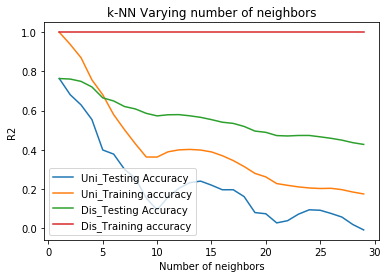

In [24]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy_uni, label='Uni_Testing Accuracy')
plt.plot(neighbors, train_accuracy_uni, label='Uni_Training accuracy')
plt.plot(neighbors, test_accuracy_dis, label='Dis_Testing Accuracy')
plt.plot(neighbors, train_accuracy_dis, label='Dis_Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('R2')
plt.show()

In [25]:
uni_knr=KNeighborsRegressor(n_neighbors=5,weights='uniform')   #初始化平均回归的KNN回归器
uni_knr.fit(X_train,y_train)
uni_knr_y_predict=uni_knr.predict(X_test)

dis_knr=KNeighborsRegressor(n_neighbors=5,weights='distance')   #初始化距离加权回归的KNN回归器

dis_knr.fit(X_train,y_train)
dis_knr_y_predict=dis_knr.predict(X_test)

#### result

In [26]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print('!!!!!R-squared value of uniform-weighted KNeighborsRegression:',uni_knr.score(X_test,y_test))
print('The mean squared error of uniform-weighted KNeighborsRegression:',mean_squared_error(ss_y.inverse_transform(y_test),
                                                                                            ss_y.inverse_transform(uni_knr_y_predict)))
print('The mean absolute error of uniform-weighted KNeighborsRegression:',mean_absolute_error(ss_y.inverse_transform(y_test),
                                                                                              ss_y.inverse_transform(uni_knr_y_predict)))
print(' ')
print('!!!!!R-squared value of distance-weighted KNeighborsRegression:',dis_knr.score(X_test,y_test))
print('The mean squared error of distance-weighted KNeighborsRegression:',mean_squared_error(ss_y.inverse_transform(y_test),
                                                                                             ss_y.inverse_transform(dis_knr_y_predict)))
print('The mean absolute error of distance-weighted KNeighborsRegression:',mean_absolute_error(ss_y.inverse_transform(y_test),
                                                                                               ss_y.inverse_transform(dis_knr_y_predict)))

!!!!!R-squared value of uniform-weighted KNeighborsRegression: 0.3988521320142937
The mean squared error of uniform-weighted KNeighborsRegression: 19669.774140265185
The mean absolute error of uniform-weighted KNeighborsRegression: 73.21046659845003
 
!!!!!R-squared value of distance-weighted KNeighborsRegression: 0.6650410711103663
The mean squared error of distance-weighted KNeighborsRegression: 10959.976452384095
The mean absolute error of distance-weighted KNeighborsRegression: 51.50491953562413
